# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## 










**1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings 
warnings.filterwarnings("ignore")


In [2]:
# Import the libraries you will be using for analysis 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.3.3
pandas version: 2.3.2
matplotlib version: 3.10.6
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
os.chdir("project_library/EDA NYC Taxi")
dff = pd.read_parquet("Datasets and Dictionary/trip_records/2023-1.parquet")
dff.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               3041714 non-null  int64         
 1   tpep_pickup_datetime   3041714 non-null  datetime64[us]
 2   tpep_dropoff_datetime  3041714 non-null  datetime64[us]
 3   passenger_count        2970028 non-null  float64       
 4   trip_distance          3041714 non-null  float64       
 5   RatecodeID             2970028 non-null  float64       
 6   store_and_fwd_flag     2970028 non-null  object        
 7   PULocationID           3041714 non-null  int64         
 8   DOLocationID           3041714 non-null  int64         
 9   payment_type           3041714 non-null  int64         
 10  fare_amount            3041714 non-null  float64       
 11  extra                  3041714 non-null  float64       
 12  mta_tax                3041714 no

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
## os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')
os.chdir("project_library/EDA NYC Taxi/Datasets and Dictionary/trip_records")

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        temp = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe
        sampled_data = temp.groupby([temp.tpep_pickup_datetime.dt.date, 
                                     temp.tpep_pickup_datetime.dt.hour]).sample(frac = 0.05, random_state= 1)
        # Concatenate the sampled data of all the dates to a single dataframe
        # df =  we initialised this empty DF earlier
        df = pd.concat([df,sampled_data])
    

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

import os 
os.chdir("D:/MyJupyternotebookfiles/Python/project_library/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records")
file_list = os.listdir()

df= pd.DataFrame()
for file_name in file_list: 
    try:
        file_path = os.path.join(os.getcwd(), file_name)
        temp = pd.read_parquet(file_path)
        sampled_data = temp.groupby([temp.tpep_pickup_datetime.dt.date, temp.tpep_pickup_datetime.dt.hour]).sample(frac = 0.05, random_state= 1)
        df = pd.concat([df,sampled_data])
    
    except Exception as e: 
        print(f"Error reading file {file_name} : {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet("Sampled_NYC_taxi_records")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df = pd.read_parquet("Sampled_NYC_taxi_records")


In [10]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1996077 entries, 4616 to 3196301
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1996077 non-null  int64         
 1   tpep_pickup_datetime   1996077 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1996077 non-null  datetime64[us]
 3   passenger_count        1927525 non-null  float64       
 4   trip_distance          1996077 non-null  float64       
 5   RatecodeID             1927525 non-null  float64       
 6   store_and_fwd_flag     1927525 non-null  object        
 7   PULocationID           1996077 non-null  int64         
 8   DOLocationID           1996077 non-null  int64         
 9   payment_type           1996077 non-null  int64         
 10  fare_amount            1996077 non-null  float64       
 11  extra                  1996077 non-null  float64       
 12  mta_tax                1996077

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [11]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop= "index", inplace= True)
df = df.iloc[1:] # the first row had the pickup time of previous , it is best to leave that row for further analysis
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
1,2,2023-01-01 00:39:52,2023-01-01 00:56:21,1.0,2.96,1.0,N,144,246,1,17.7,1.0,0.5,4.54,0.0,1.0,27.24,2.5,0.0,NaN
2,1,2023-01-01 00:52:58,2023-01-01 00:58:20,1.0,1.50,1.0,N,141,263,1,8.6,3.5,0.5,2.70,0.0,1.0,16.30,2.5,0.0,NaN
3,2,2023-01-01 00:40:59,2023-01-01 00:50:00,3.0,0.88,1.0,N,90,170,1,9.3,1.0,0.5,2.86,0.0,1.0,17.16,2.5,0.0,NaN
4,1,2023-01-01 00:44:10,2023-01-01 01:01:19,2.0,2.80,1.0,N,142,263,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.0,NaN
5,2,2023-01-01 00:31:30,2023-01-01 00:41:56,1.0,1.82,1.0,N,143,50,1,12.1,1.0,0.5,2.00,0.0,1.0,19.10,2.5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996072,1,2023-12-31 23:29:45,2023-12-31 23:43:10,2.0,2.50,1.0,N,24,143,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,NaN,0.0
1996073,1,2023-12-31 23:27:08,2023-12-31 23:48:43,NaN,5.40,NaN,None,236,90,0,26.8,1.0,0.5,6.36,0.0,1.0,38.16,NaN,NaN,NaN
1996074,2,2023-12-31 23:31:35,2023-12-31 23:38:40,2.0,1.14,1.0,N,262,237,1,8.6,1.0,0.5,2.72,0.0,1.0,16.32,2.5,NaN,0.0
1996075,1,2023-12-31 23:07:27,2023-12-31 23:12:18,1.0,0.90,1.0,N,43,237,2,6.5,3.5,0.5,0.00,0.0,1.0,11.50,2.5,NaN,0.0


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [12]:
# Combine the two airport fee columns
df["airport_fee"] = df.airport_fee.add(df.Airport_fee, fill_value = 0)
df.drop("Airport_fee", axis = 1, inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [13]:
# check where values of fare amount are negative
df[df.fare_amount < 0 ]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [14]:
neg_amount = df[df.total_amount < 0]
neg_amount

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
4429,2,2023-01-02 11:03:12,2023-01-02 11:05:47,1.0,0.01,2.0,N,186,186,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.0,-2.5,0.0
23337,2,2023-01-06 15:27:42,2023-01-06 15:27:52,1.0,0.02,2.0,N,100,100,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.0,-2.5,0.0
46948,2,2023-01-11 14:02:37,2023-01-11 14:02:54,2.0,0.02,2.0,N,164,164,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.0,-2.5,0.0
97588,2,2023-01-21 04:12:03,2023-01-21 04:20:26,2.0,1.60,1.0,N,100,234,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.0,-2.5,0.0
112434,2,2023-01-24 10:09:06,2023-01-24 10:59:05,1.0,18.89,2.0,N,48,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.0,-2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897630,2,2023-01-06 15:27:42,2023-01-06 15:27:52,1.0,0.02,2.0,N,100,100,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.0,-2.5,0.0
1916202,2,2023-03-15 18:48:07,2023-03-15 18:50:55,1.0,0.13,1.0,N,163,230,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.0,-2.5,0.0
1941703,2,2023-06-11 14:08:41,2023-06-11 14:25:32,1.0,0.00,5.0,N,231,231,2,0.0,0.0,0.0,0.0,0.0,-1.0,-3.5,-2.5,0.0
1953627,2,2023-07-27 17:53:00,2023-07-27 17:53:03,1.0,0.00,1.0,N,140,264,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.0,-2.5,0.0


Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts
neg_amount.value_counts(["RatecodeID"])

RatecodeID
1.0           46
2.0           27
5.0            7
3.0            1
Name: count, dtype: int64

In [16]:
# Find which columns have negative values

numeric = []
for item in  df.columns.values: 
    if df[item].dtype in ["int64", "float64"]: 
        numeric.append(item)
(df[numeric] < 0).sum()

VendorID                  0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     1
mta_tax                  74
tip_amount                0
tolls_amount              0
improvement_surcharge    81
total_amount             81
congestion_surcharge     63
airport_fee              14
dtype: int64

In [17]:
 # fix these negative values
(df[df.total_amount >= 0][numeric] < 0).sum()
# As we can see if we drop those rows where total_amount is negative all of the others columns where values were negative are getting dropped . 

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

In [18]:
df = df[~(df.total_amount < 0)]

In [19]:
df[(df.tpep_dropoff_datetime < df.tpep_pickup_datetime)][["fare_amount", "trip_distance", "total_amount"]].describe()

,fare_amount,trip_distance,total_amount
count,107.000000,107.000000,107.000000
mean,32.110280,5.835234,36.255421
std,16.557243,4.621883,15.771465
min,5.800000,0.000000,11.750000
25%,18.965000,2.175000,25.000000
50%,29.200000,4.670000,33.000000
75%,43.780000,8.685000,46.535000
max,84.000000,17.520000,93.750000


In [20]:
df[(df.tpep_dropoff_datetime <= df.tpep_pickup_datetime)][["fare_amount", "trip_distance", "total_amount"]].describe()

,fare_amount,trip_distance,total_amount
count,803.000000,803.000000,803.000000
mean,24.325928,0.891968,29.330237
std,28.327676,2.730591,30.330012
min,0.000000,0.000000,0.000000
25%,3.350000,0.000000,8.700000
50%,13.500000,0.000000,18.900000
75%,31.925000,0.000000,35.625000
max,220.000000,17.700000,247.050000


In [21]:
df = df[~(df.tpep_dropoff_datetime <= df.tpep_pickup_datetime)]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [22]:
# Find the proportion of missing values in each column
print("Proportion of  missing values in each column(%) :")
df.isna().sum()/ df.shape[0] * 100
# all of the five columns have exact proportion of missing values, so there's a possibility that they're the same rows

Proportion of  missing values in each column(%) :


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.430697
trip_distance            0.000000
RatecodeID               3.430697
store_and_fwd_flag       3.430697
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.430697
airport_fee              3.430697
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [23]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df.passenger_count.isna()][["passenger_count", "RatecodeID", "store_and_fwd_flag", "airport_fee", "congestion_surcharge"]].isna().sum()
# we are 100% sure that all of the 68410 rows where passenger_count is NaN , all the other four columns were also negative in all rows. 


passenger_count         68449
RatecodeID              68449
store_and_fwd_flag      68449
airport_fee             68449
congestion_surcharge    68449
dtype: int64

In [24]:
df = df[df.passenger_count.notna()]


In [25]:
df[(df.passenger_count == 0)][["trip_distance", "fare_amount", "total_amount"]].describe()

,trip_distance,fare_amount,total_amount
count,30571.000000,30571.000000,30571.000000
mean,2.810946,17.254143,25.478083
std,3.863695,16.686321,20.275482
min,0.000000,0.000000,0.000000
25%,0.900000,8.600000,15.100000
50%,1.600000,12.100000,19.500000
75%,2.800000,19.100000,27.350000
max,83.700000,512.600000,521.850000


In [26]:
df = df[df.passenger_count > 0 ]

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [27]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.isna().sum()

np.int64(0)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [28]:
# handle null values in congestion_surcharge
df.congestion_surcharge.isna().sum()

np.int64(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [29]:
# Handle any remaining missing values
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1896172 entries, 1 to 1996076
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1896172 non-null  int64         
 1   tpep_pickup_datetime   1896172 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1896172 non-null  datetime64[us]
 3   passenger_count        1896172 non-null  float64       
 4   trip_distance          1896172 non-null  float64       
 5   RatecodeID             1896172 non-null  float64       
 6   store_and_fwd_flag     1896172 non-null  object        
 7   PULocationID           1896172 non-null  int64         
 8   DOLocationID           1896172 non-null  int64         
 9   payment_type           1896172 non-null  int64         
 10  fare_amount            1896172 non-null  float64       
 11  extra                  1896172 non-null  float64       
 12  mta_tax                1896172 no

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [30]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.896172e+06,1896172,1896172,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06,1.896172e+06
mean,1.751638e+00,2023-07-02 02:24:44.932189,2023-07-02 02:42:12.511685,1.393110e+00,3.574335e+00,1.661212e+00,1.653879e+02,1.642838e+02,1.203783e+00,1.985413e+01,1.605575e+00,4.952986e-01,3.596860e+00,6.048665e-01,9.993974e-01,2.901692e+01,2.308616e+00,1.447212e-01
min,1.000000e+00,2023-01-01 00:01:07,2023-01-01 00:06:35,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2023-04-01 22:58:11.500000,2023-04-01 23:14:45.250000,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-26 14:48:13,2023-06-26 15:07:53.500000,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-05 23:44:30,2023-10-06 00:05:02.250000,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.480000e+00,0.000000e+00,1.000000e+00,3.080000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-12-31 23:58:50,2024-01-01 18:55:59,9.000000e+00,7.467430e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,2.320110e+03,5.168000e+01,4.000000e+00,4.430500e+02,9.990000e+01,1.000000e+00,2.372790e+03,2.750000e+00,1.750000e+00
std,4.320630e-01,NaN,NaN,8.837285e-01,5.988984e+01,7.558512e+00,6.366966e+01,6.976696e+01,4.647926e-01,1.856591e+01,1.829256e+00,4.841627e-02,4.133385e+00,2.201323e+00,2.269249e-02,2.319260e+01,6.647041e-01,4.673757e-01


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [31]:
# remove passenger_count > 6
print(df.passenger_count.value_counts())
df = df[~ (df.passenger_count > 6)]


passenger_count
1.0    1447902
2.0     292805
3.0      72501
4.0      40936
5.0      25386
6.0      16625
8.0          8
9.0          5
7.0          4
Name: count, dtype: int64


In [32]:
pd.cut(df.trip_distance, [0,2,5,10,50, 100,200,250,1000 ]).value_counts()

trip_distance
(0, 2]         1038552
(2, 5]          509369
(10, 50]        165838
(5, 10]         160203
(50, 100]          240
(100, 200]          17
(200, 250]           0
(250, 1000]          0
Name: count, dtype: int64

47


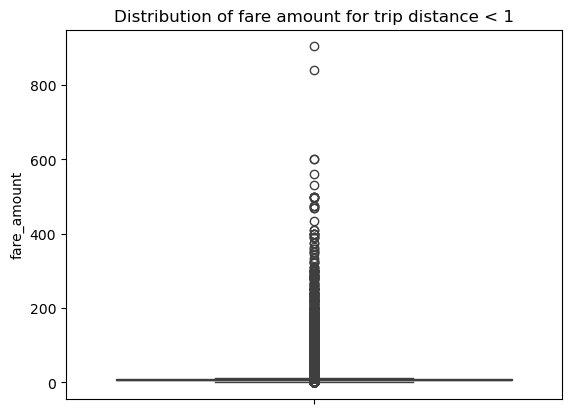

In [33]:
print(df[((df.trip_distance <= 1) & (df.fare_amount> 300))].shape[0])
sns.boxplot(df[df.trip_distance <= 1], y = "fare_amount")
plt.title("Distribution of fare amount for trip distance < 1");

In [34]:
df[((df.trip_distance ==0 ) & ( df.fare_amount == 0)  & (df.PULocationID != df.DOLocationID))].shape[0]

15

In [35]:
# Continue with outlier handling
df = df[~(df.trip_distance > 250)]

df = df[~((df.trip_distance <= 0.5) & (df.fare_amount > 300))]

df = df[~((df.trip_distance ==0 ) & ( df.fare_amount == 0)  & (df.PULocationID != df.DOLocationID))]
df.payment_type.value_counts()

payment_type
1    1546545
2     326853
4      14138
3       8546
Name: count, dtype: int64

In [36]:
# Do any columns need standardising?
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [37]:
df["pickup_hour"]  =  df.tpep_pickup_datetime.dt.hour
df["dropoff_hour"] = df.tpep_dropoff_datetime.dt.hour
df["trip_duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [38]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_hour',
 'dropoff_hour',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [39]:
categorical = ["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", 
               "RatecodeID", "PULocationID", "DOLocationID", "payment_type","store_and_fwd_flag", "pickup_hour", "dropoff_hour"]
numerical = [m for m in df.columns.tolist() if m not in categorical]
numerical

['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'trip_duration']

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

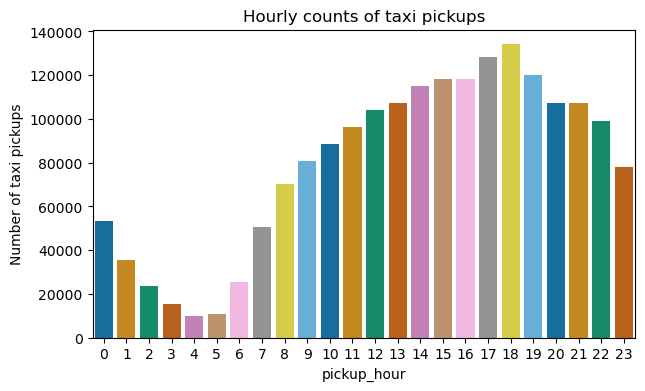

In [40]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize= (7,4))
sns.countplot(df, x = "pickup_hour", palette="colorblind")
plt.ylabel("Number of taxi pickups")
plt.title("Hourly counts of taxi pickups")
plt.show()

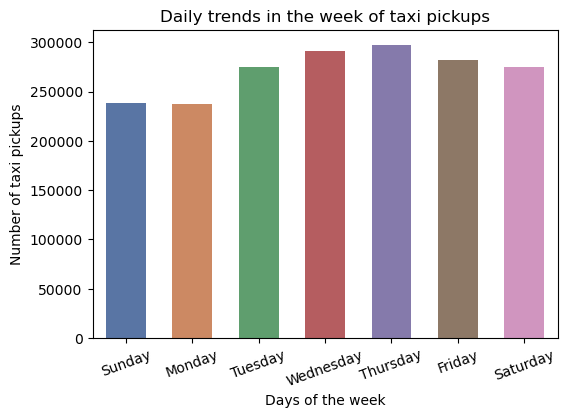

In [41]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize=(6,4))
sns.countplot(df, x = df.tpep_pickup_datetime.dt.day_name(), palette= "deep", width = 0.6)
plt.xlabel("Days of the week") 
plt.xticks(rotation = 20)
plt.ylabel("Number of taxi pickups")
plt.title("Daily trends in the week of taxi pickups")
plt.show()


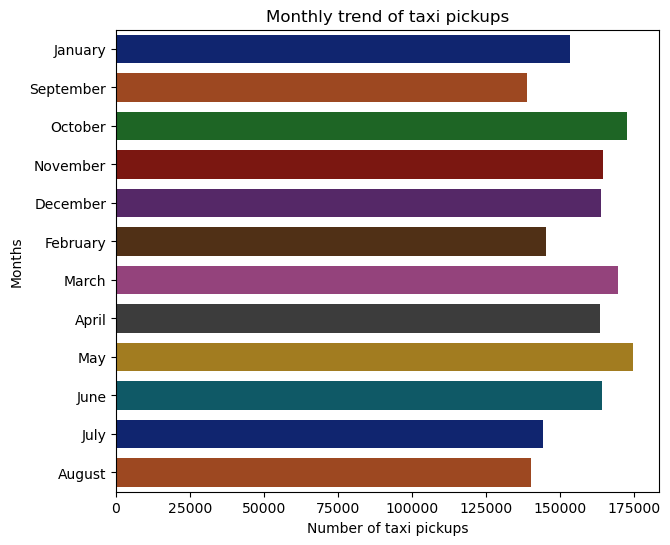

In [42]:
# Show the monthly trends in pickups
plt.figure(figsize= (7,6))
sns.countplot(df, y = df.tpep_pickup_datetime.dt.month_name(), palette= "dark", orient= "y", width = 0.5, gap= -.5)
plt.xlabel("Number of taxi pickups") 
plt.ylabel("Months") 
plt.title("Monthly trend of taxi pickups")
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [43]:
# Analyse the above parameters
df[["fare_amount", "tip_amount", "total_amount", "trip_distance"]].describe()

,fare_amount,tip_amount,total_amount,trip_distance
count,1.896082e+06,1.896082e+06,1.896082e+06,1.896082e+06
mean,1.984438e+01,3.596607e+00,2.900706e+01,3.471928e+00
std,1.845796e+01,4.131555e+00,2.310477e+01,4.578873e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.300000e+00,1.000000e+00,1.596000e+01,1.060000e+00
50%,1.350000e+01,2.860000e+00,2.100000e+01,1.790000e+00
75%,2.190000e+01,4.480000e+00,3.080000e+01,3.400000e+00
max,2.320110e+03,4.430500e+02,2.372790e+03,1.870000e+02


In [44]:
(df[["fare_amount", "tip_amount", "total_amount", "trip_distance"]] ==0).sum()
# the tip amount can be zero and there are a lot of cash tips which is not included in the data set,
# that explains the number of zeros present in the tip_amount column

fare_amount         456
tip_amount       422776
total_amount        217
trip_distance     21866
dtype: int64

In [45]:
# as we can see the columns where trip distance is zero, the median of trip duration is only 34 seconds. 
#That means the rides get cancelled right after started due to various reasons.
df[df.trip_distance == 0]["trip_duration"].describe()

count                     21866
mean     0 days 00:11:45.542943
std      0 days 01:44:13.226777
min             0 days 00:00:01
25%             0 days 00:00:10
50%             0 days 00:00:34
75%      0 days 00:11:23.750000
max             6 days 06:14:54
Name: trip_duration, dtype: object

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [46]:
# Create a df with non zero entries for the selected parameters.

df = df[~((df.fare_amount == 0) | ( df.total_amount == 0))]

In [47]:
# Checking  where trip distance is zero and pickup and drop location is the same
df[(df.trip_distance == 0) & (df.PULocationID == df.DOLocationID)][["trip_duration", "fare_amount"]].describe()

,trip_duration,fare_amount
count,14382,14382.000000
mean,0 days 00:03:23.096857,31.430548
std,0 days 00:39:13.495232,40.215199
min,0 days 00:00:01,0.010000
25%,0 days 00:00:08,3.000000
50%,0 days 00:00:15,10.000000
75%,0 days 00:00:48,70.000000
max,1 days 16:33:03,300.000000


In [48]:
df[(df.trip_distance == 0) & (df.PULocationID == df.DOLocationID)][["trip_duration", "fare_amount"]].quantile([0.5,.75, 0.9, .99, 1])

,trip_duration,fare_amount
0.50,0 days 00:00:15,10.000
0.75,0 days 00:00:48,70.000
0.90,0 days 00:05:28,83.000
0.99,0 days 00:39:28.570000,178.095
1.00,1 days 16:33:03,300.000


In [49]:
# Checking  where trip distance is zero and pickup and drop location is not the same
df[(df.trip_distance == 0) & (df.PULocationID != df.DOLocationID)][["trip_duration", "fare_amount"]].describe()

,trip_duration,fare_amount
count,7278,7278.000000
mean,0 days 00:27:50.182605,26.291465
std,0 days 02:47:45.733913,23.518516
min,0 days 00:00:01,0.010000
25%,0 days 00:07:07.250000,10.000000
50%,0 days 00:16:57.500000,18.450000
75%,0 days 00:33:40.750000,36.600000
max,6 days 06:14:54,275.000000


In [50]:
df[(df.trip_distance == 0) & (df.PULocationID != df.DOLocationID)][["trip_duration", "fare_amount"]].quantile([0.5, .75, 0.9, .99, 1])

,trip_duration,fare_amount
0.50,0 days 00:16:57.500000,18.4500
0.75,0 days 00:33:40.750000,36.6000
0.90,0 days 00:53:16.300000,57.2000
0.99,0 days 01:32:00.149999,92.8075
1.00,6 days 06:14:54,275.0000


In [51]:
# looks like in both cases there's some outlies present, so it is not logical to remove all the rows so , we will tke upto 99 percentile.
print(df[df.trip_distance == 0 ][["trip_duration", "fare_amount"]].quantile([.75, .99, 1]))
df = df[~((df.trip_distance == 0) & (df.trip_duration > pd.Timedelta(hours = 1, minutes = 15)) & (df.fare_amount > 155))]

              trip_duration  fare_amount
0.75        0 days 00:11:34        47.20
0.99 0 days 01:16:50.049999       158.41
1.00        6 days 06:14:54       300.00


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

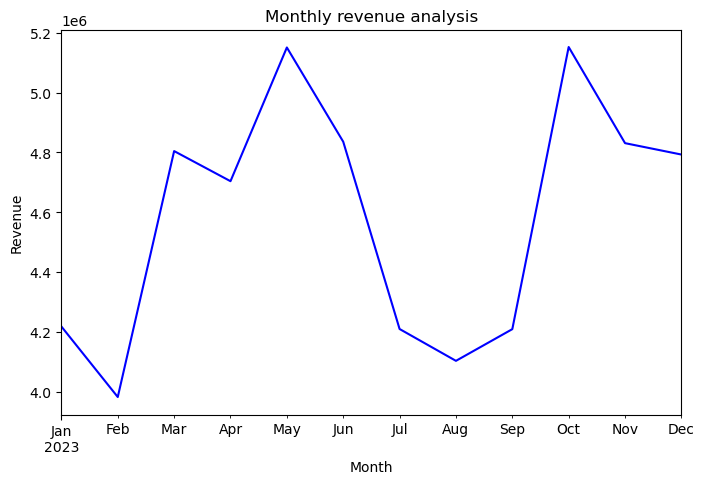

In [52]:
# Group data by month and analyse monthly revenue
df.set_index("tpep_pickup_datetime").resample("M")["total_amount"].sum().plot(figsize = (8,5), color = "blue",
                                                                              xlabel = "Month", ylabel = "Revenue",
                                                                             title = "Monthly revenue analysis");

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [53]:
# Calculate proportion of each quarter
df["quarter"] = df.tpep_pickup_datetime.dt.to_period(freq= "Q")
quarter_sum = df.groupby("quarter")[["total_amount"]].sum()
print(f"The proportion of each quarter of the year in the revenue is (%): \n {quarter_sum/ quarter_sum.sum() * 100}")

The proportion of each quarter of the year in the revenue is (%): 
          total_amount
quarter              
2023Q1      23.648534
2023Q2      26.712081
2023Q3      22.771410
2023Q4      26.867976


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

               trip_distance  fare_amount
trip_distance       1.000000     0.940676
fare_amount         0.940676     1.000000


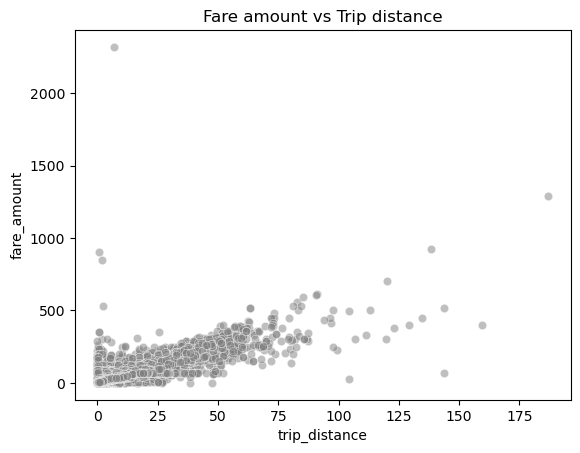

In [54]:
# Show how trip fare is affected by distance
sample_df = df[df.trip_distance != 0][["trip_distance", "fare_amount"]]
print(sample_df.corr())
# we can see the trip distance and fare amount is highly correlated

sns.scatterplot(sample_df , x = "trip_distance", y = "fare_amount", color ="grey", alpha = 0.5)
plt.title("Fare amount vs Trip distance");


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

               fare_amount  trip_duration
fare_amount       1.000000       0.260788
trip_duration     0.260788       1.000000


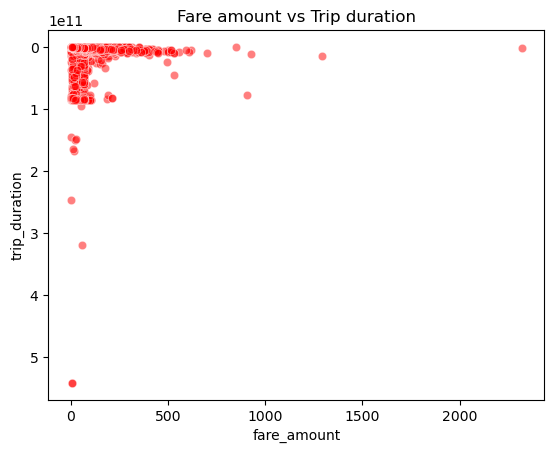

In [55]:
# Show relationship between fare and trip duration
print(df[["fare_amount", "trip_duration"]].corr())
sns.scatterplot(df, x = "fare_amount", y = "trip_duration", color = "red", alpha = 0.5)
plt.title("Fare amount vs Trip duration");

                 fare_amount  passenger_count
fare_amount         1.000000         0.044651
passenger_count     0.044651         1.000000


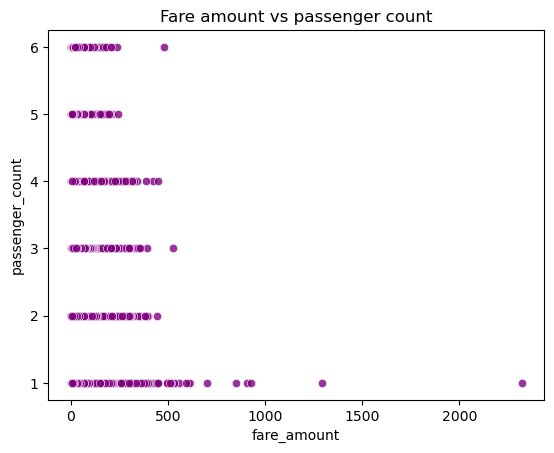

In [56]:
# Show relationship between fare and number of passengers
print(df[["fare_amount", "passenger_count"]].corr())
sns.scatterplot(df, x = "fare_amount", y = "passenger_count", color="purple", alpha = 0.8)
plt.title("Fare amount vs passenger count");


               tip_amount  trip_distance
tip_amount       1.000000       0.572224
trip_distance    0.572224       1.000000


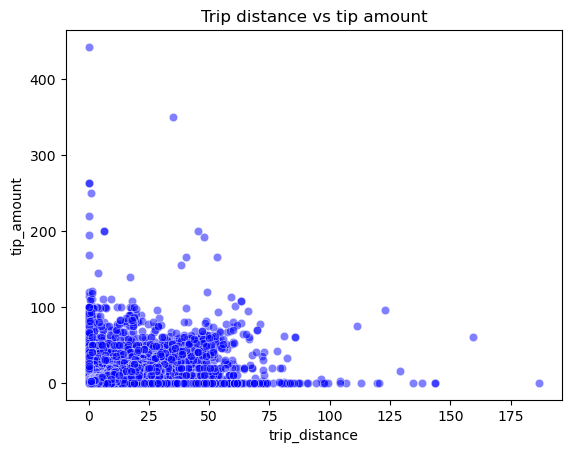

In [57]:
# Show relationship between tip and trip distance
print(df[["tip_amount", "trip_distance"]].corr())
sns.scatterplot(df, x = "trip_distance", y = "tip_amount", color = "blue", alpha = 0.5)
plt.title("Trip distance vs tip amount");

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

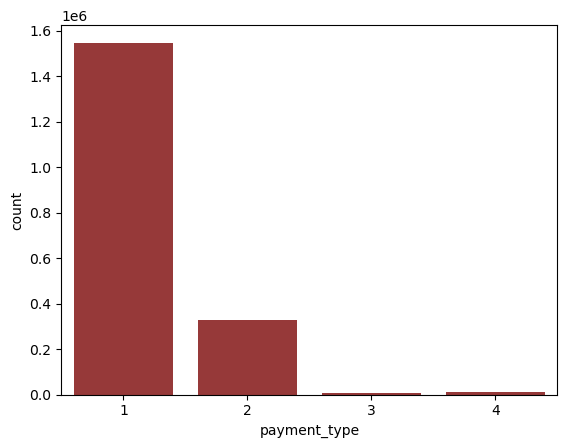

In [58]:
# Analyse the distribution of different payment types (payment_type)
sns.countplot(df,  x = "payment_type", color = "brown");

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [59]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [60]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("D:/MyJupyternotebookfiles/Python/project_library/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

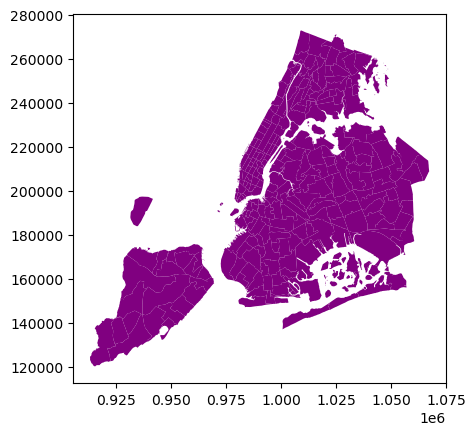

In [61]:
print(zones.info())
zones.plot(color = "purple")

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [62]:
# Merge zones and trip records using locationID and PULocationID
merged = pd.merge(df, zones, left_on = "PULocationID", right_on = "LocationID")
merged.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_hour,trip_duration,quarter,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:39:52,2023-01-01 00:56:21,1.0,2.96,1.0,N,144,246,1,...,0,0 days 00:16:29,2023Q1,144,0.027620,0.000047,Little Italy/NoLiTa,144,Manhattan,"POLYGON ((985411.76 200369.518, 985342.573 200..."
1,1,2023-01-01 00:52:58,2023-01-01 00:58:20,1.0,1.50,1.0,N,141,263,1,...,0,0 days 00:05:22,2023Q1,141,0.041514,0.000077,Lenox Hill West,141,Manhattan,"POLYGON ((994839.073 216123.698, 994786.74 216..."
2,2,2023-01-01 00:40:59,2023-01-01 00:50:00,3.0,0.88,1.0,N,90,170,1,...,0,0 days 00:09:01,2023Q1,90,0.030759,0.000055,Flatiron,90,Manhattan,"POLYGON ((985265.129 208165.863, 985125.733 20..."
3,1,2023-01-01 00:44:10,2023-01-01 01:01:19,2.0,2.80,1.0,N,142,263,1,...,1,0 days 00:17:09,2023Q1,142,0.038176,0.000076,Lincoln Square East,142,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
4,2,2023-01-01 00:31:30,2023-01-01 00:41:56,1.0,1.82,1.0,N,143,50,1,...,0,0 days 00:10:26,2023Q1,143,0.054180,0.000151,Lincoln Square West,143,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [63]:
# Group data by location and calculate the number of trips
trips_per_location = merged.groupby("LocationID").size().to_frame()
trips_per_location.head()
trips_per_zone = merged.groupby("zone").size().to_frame()
trips_per_zone.head()

,0
zone,
Allerton/Pelham Gardens,36
Alphabet City,1867
Arden Heights,21
Arrochar/Fort Wadsworth,33
Astoria,860


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [64]:
# Merge trip counts back to the zones GeoDataFrame
zones_trips = pd.merge(zones, trips_per_location ,left_on= "LocationID", right_index= True).rename({0: "no_of_trips"}, axis = 1)
zones_trips.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,no_of_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",236
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",4
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",36
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1867
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",21


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

Text(0.5, 1.0, 'No of trips per zone')

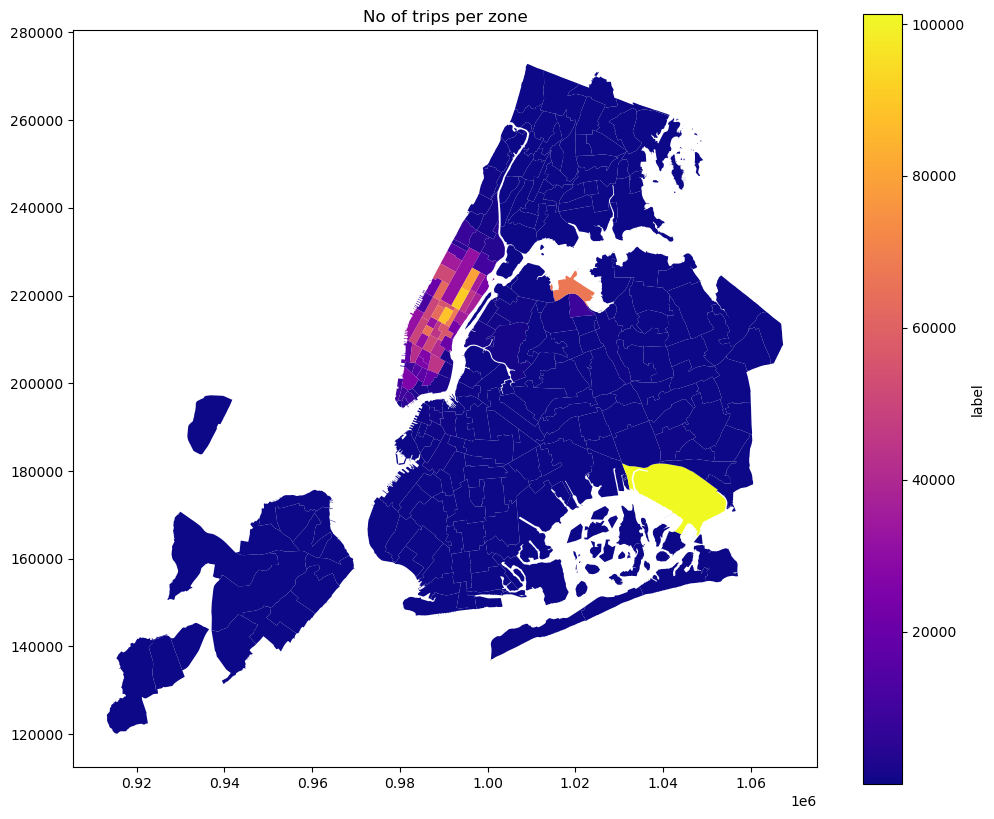

In [65]:
# Define figure and axis
fig, ax = plt.subplots(1, 1 ,figsize =(12,10))


# Plot the map and display it

zones_trips.plot(column = "no_of_trips", ax = ax, cmap = "plasma", legend = True, legend_kwds = {'label': "label", 'orientation': "vertical"})
plt.title("No of trips per zone")

In [66]:
# can you try displaying the zones DF sorted by the number of trips?
zones_trips.sort_values(by = "no_of_trips", ascending= False).head(10)


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,no_of_trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",101357
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",90643
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",88395
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",79478
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",68247
137,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",67190
185,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21...",65577
229,230,0.031028,0.000056,Times Sq/Theatre District,230,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21...",63285
141,142,0.038176,0.000076,Lincoln Square East,142,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",62667
169,170,0.045769,0.000074,Murray Hill,170,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21...",56277


It is very clear the big yellow area in the map is the JFK Airport zone as in the list we can see it's shape area in much higher than rest of the list and we can also ensure it from the map.

In [67]:
# I'm creating a custom zone group from the borough to visualize the zones better
zones["zone_group"] = zones["borough"]
zones.loc[zones.zone.str.contains("Airport", case=False, na=False), "zone_group"] = "Airport"

In [68]:
df = df.merge( zones[["LocationID", "zone_group"]], left_on="PULocationID", right_on="LocationID", how="left" )

df = df.rename(columns={"zone_group": "pickup_zone_group"}).drop(columns="LocationID")

df = df.merge(zones[["LocationID", "zone_group"]], left_on="DOLocationID", right_on="LocationID", how="left")

df = df.rename(columns={"zone_group": "dropoff_zone_group"}).drop(columns="LocationID")


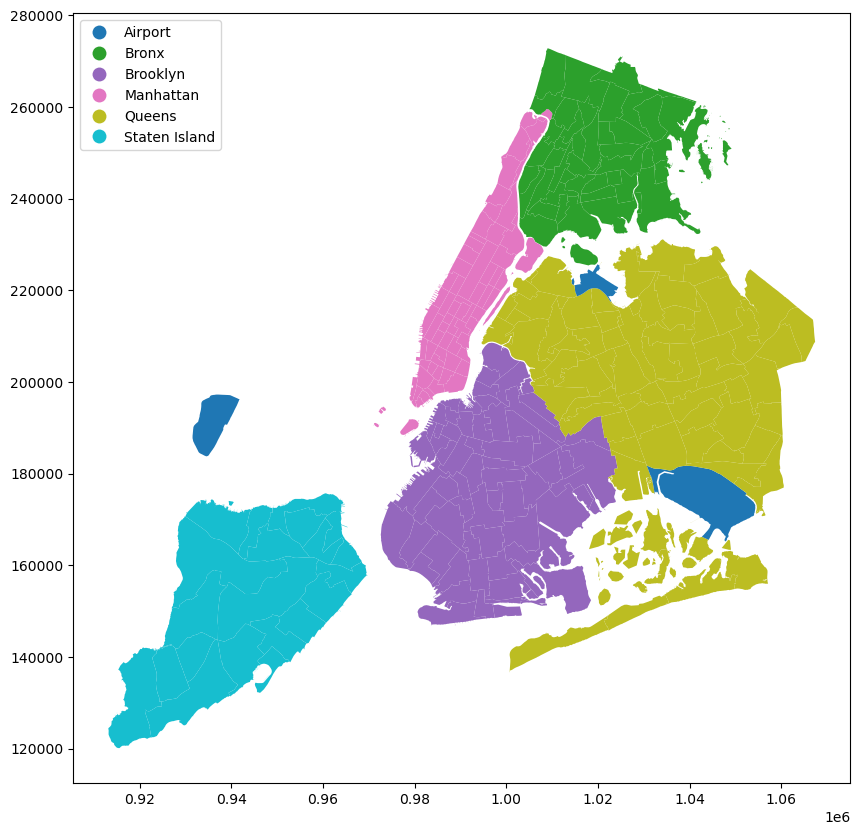

In [69]:
zones.plot(column = "zone_group", legend = True, figsize = (12,10), legend_kwds = {"loc": "upper left"});

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [70]:
df["trip_duration"]  = df.trip_duration.dt.seconds/3600

In [71]:
df.groupby(["PULocationID", 
            "DOLocationID", 
            "pickup_hour"])["trip_duration"].mean().reset_index(name = "average_trip_duration_route").sort_values("average_trip_duration_route", ascending = False).iloc[:10]


,PULocationID,DOLocationID,pickup_hour,average_trip_duration_route
30681,88,198,23,23.963333
74626,161,121,20,23.963333
97710,228,13,0,23.962222
110877,236,217,12,23.935833
106753,233,223,18,23.928056
6795,40,65,21,23.907222
27710,80,233,16,23.907222
11967,48,106,17,23.901389
82178,164,217,14,23.878611
13341,48,247,23,23.873056


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

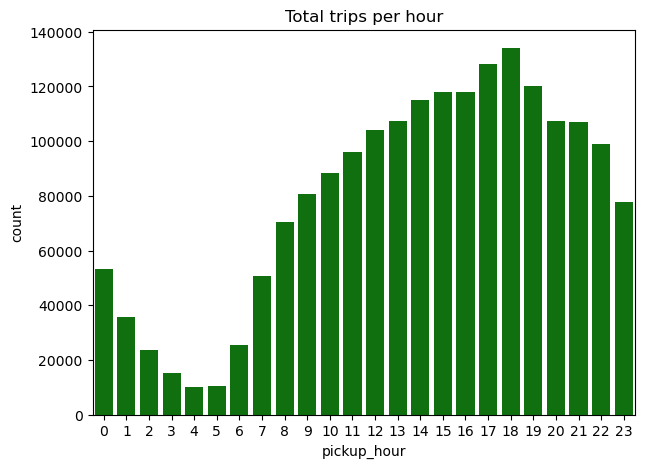

In [72]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize=(7,5))
sns.countplot(df, x = "pickup_hour", color= "green")
plt.title("Total trips per hour");


In [73]:
busiest_hours = df.pickup_hour.value_counts(ascending=False)
print(f"The busiest hour is : {busiest_hours.index[0]} \ntotal pickup is : {busiest_hours.iloc[0]}")

The busiest hour is : 18 
total pickup is : 134098


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [74]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = df.pickup_hour.value_counts(ascending=False)
actual = sample_fraction * 100/5
print(f"The actual number of total trips is :\nby {actual[:5]}")


The actual number of total trips is :
by pickup_hour
18    2681960.0
17    2562540.0
19    2404240.0
16    2362380.0
15    2360700.0
Name: count, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

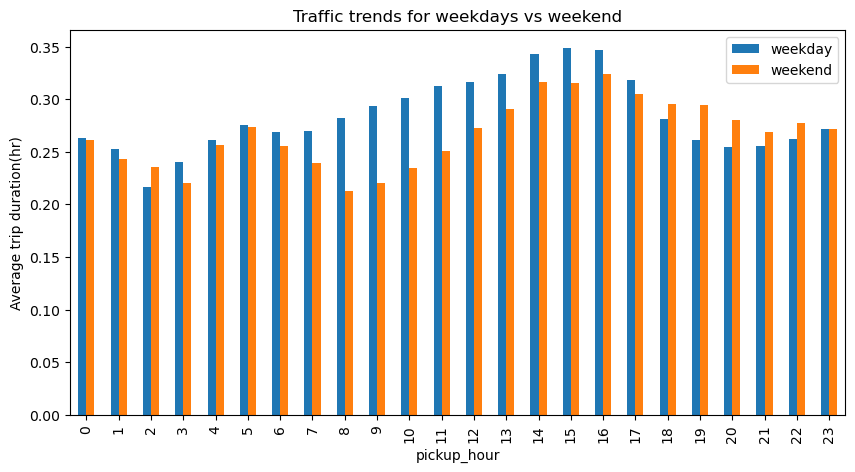

In [75]:
# Compare traffic trends for the week days and weekends
traffic_trends = pd.DataFrame({"weekday" : df[df.tpep_pickup_datetime.dt.dayofweek.isin([0,1,2,3,4])].groupby("pickup_hour")["trip_duration"].mean(),
                               "weekend": df[df.tpep_pickup_datetime.dt.dayofweek.isin([5,6])].groupby("pickup_hour")["trip_duration"].mean()})

fig, ax = plt.subplots(figsize = (10,5))
traffic_trends.plot.bar(ax = ax)
ax.set_ylabel("Average trip duration(hr)")
ax.set_title("Traffic trends for weekdays vs weekend")
plt.show()

It is very clear that in weekdays , during the late morning and day time (from 8 am to 2 pm), average trip duration is significantly higher than that of weekend.
But the evening trips are slightly higher in weekend time than that of weekday.

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [76]:
# Find top 10 pickup and dropoff zones
hourly_pickup = df.groupby(["PULocationID","pickup_hour"]).size().reset_index(name = "pickup_count")
top_pickup_zones = hourly_pickup.groupby("PULocationID")["pickup_count"].mean().reset_index(name= "avg_hourly_pickups").nlargest(10, "avg_hourly_pickups").PULocationID
top_pickup_trend = df[df.PULocationID.isin(top_pickup_zones)].groupby(["PULocationID", "pickup_hour"]).size().reset_index(name = "pickup_count")

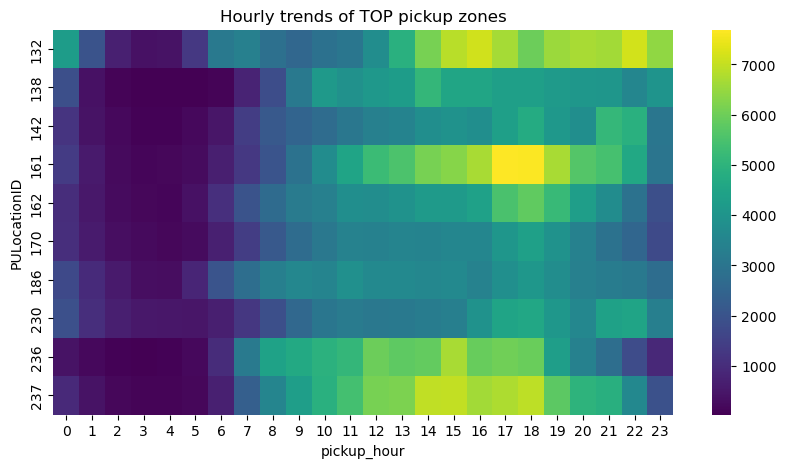

In [77]:
pickup_heatmap = top_pickup_trend.pivot(index = "PULocationID", columns="pickup_hour", values = "pickup_count")

plt.figure(figsize=(10,5))
sns.heatmap(pickup_heatmap, cmap = "viridis")
plt.title("Hourly trends of TOP pickup zones");

In [78]:
hourly_dropff = df.groupby(["DOLocationID", "dropoff_hour"]).size().reset_index(name = "dropoff_count")
top_dropoff_zones = hourly_dropff.groupby("DOLocationID")["dropoff_count"].mean().reset_index(name= "avg_hourly_dropoffs").nlargest(10, "avg_hourly_dropoffs").DOLocationID
top_dropoff_trend = df[df.DOLocationID.isin(top_dropoff_zones)].groupby(["DOLocationID",df.tpep_dropoff_datetime.dt.hour ]).size().reset_index(name = "dropoff_count").rename({"tpep_dropoff_datetime": "dropoff_hour"}, axis = 1)


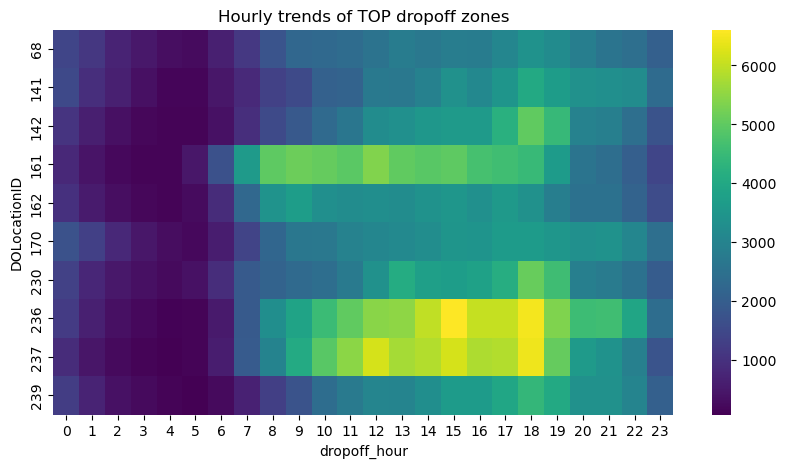

In [79]:
dropoff_heatmap = top_dropoff_trend.pivot(index = "DOLocationID", columns="dropoff_hour", values = "dropoff_count")

plt.figure(figsize=(10,5))
sns.heatmap(dropoff_heatmap, cmap = "viridis")
plt.title("Hourly trends of TOP dropoff zones");

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [80]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

total = pd.merge(df.groupby("PULocationID").size().reset_index(name = "total_pickups") ,
        df.groupby("DOLocationID").size().reset_index(name = "total_dropoffs"), left_on = "PULocationID", right_on="DOLocationID")
total["ratio"] = total.total_pickups / total.total_dropoffs

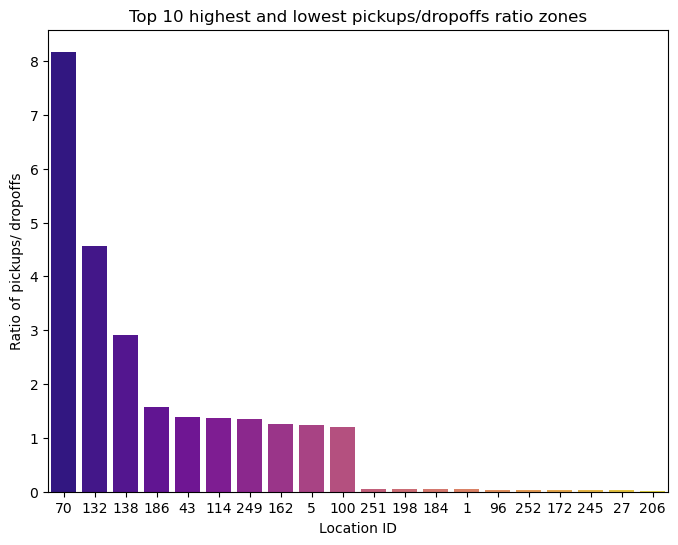

In [81]:
plot_total = (pd.concat([total.nlargest(10,"ratio"), total.nsmallest(10, "ratio")])).sort_values("ratio",ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(plot_total, x = "PULocationID", y = "ratio", order = plot_total.PULocationID, palette= "plasma")
plt.xlabel("Location ID")
plt.ylabel("Ratio of pickups/ dropoffs")
plt.title("Top 10 highest and lowest pickups/dropoffs ratio zones");

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [82]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

top_pickup_night = df[df.pickup_hour.isin([23,0,1,2,3,4,5])].groupby("PULocationID").size().reset_index(name = "total_pickups").nlargest(10, "total_pickups") 
top_dropoff_night= df[df.dropoff_hour.isin([23,0,1,2,3,4,5])].groupby("DOLocationID").size().reset_index(name = "total_dropoffs").nlargest(10, "total_dropoffs")


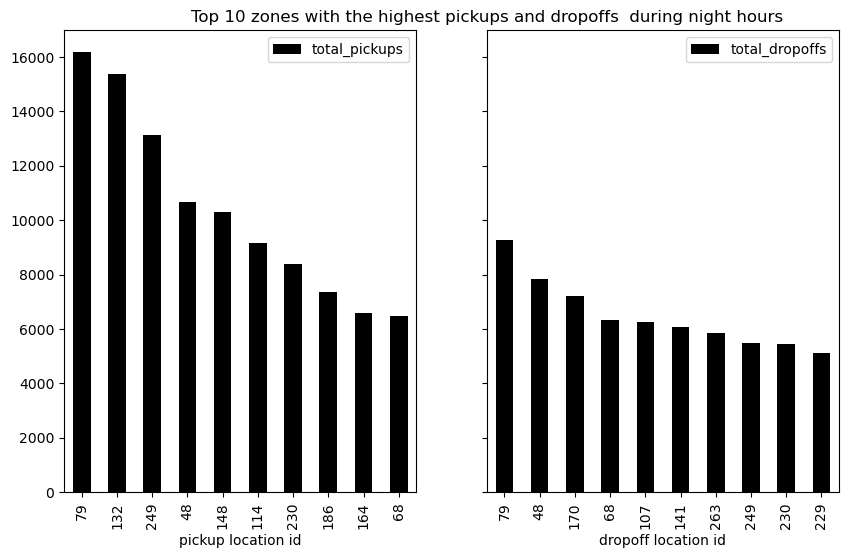

In [83]:
fig , ax = plt.subplots(1, 2 ,figsize = (10,6), sharey= True)
top_pickup_night.plot(kind = "bar",x = "PULocationID", y = "total_pickups" , ax = ax[0], color = "black", xlabel = "pickup location id")
top_dropoff_night.plot(kind = "bar",x = "DOLocationID", y = "total_dropoffs" , ax = ax[1], color = "black", xlabel = "dropoff location id")


plt.title("Top 10 zones with the highest pickups and dropoffs  during night hours", x = 0);

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [84]:
# Filter for night hours (11 PM to 5 AM)
total_revenue = df.groupby("pickup_hour")["total_amount"].sum()
nighttime_revenue_share = (total_revenue[[23,0,1,2,3,4,5]]/ total_revenue.sum()*100).reset_index(name = "revenue_share")
daytime_revenue_share = (total_revenue.loc[6:22]/ total_revenue.sum()*100).reset_index(name= "revenue_share")
revenue_share = pd.concat([nighttime_revenue_share, daytime_revenue_share])

revenue_share["time_period"]= np.where(revenue_share["pickup_hour"].between(6,22), "Day", "Night")
revenue_share.sample(2)

,pickup_hour,revenue_share,time_period
3,9,3.949415,Day
1,0,2.858047,Night


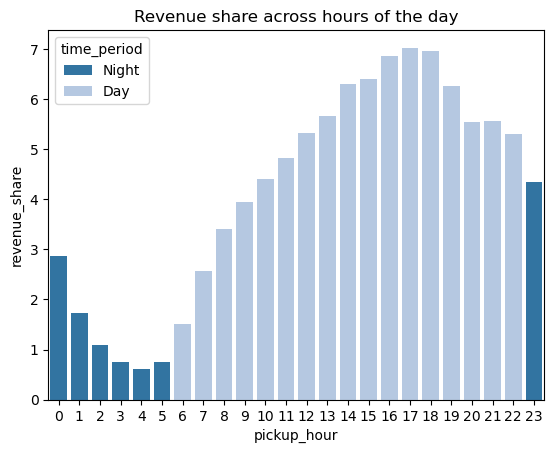

In [85]:
sns.barplot(revenue_share, x = "pickup_hour", y = "revenue_share", hue = "time_period", palette = "tab20")
plt.title("Revenue share across hours of the day");

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

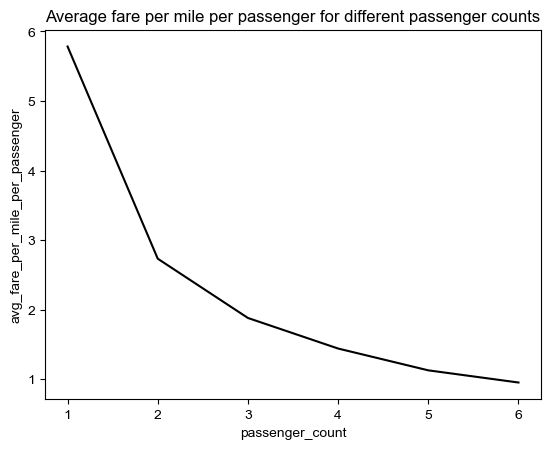

In [86]:
# Analyse the fare per mile per passenger for different passenger counts
all_values = df.groupby("passenger_count", as_index= False)[["fare_amount", "trip_distance"]].sum()
all_values["avg_fare_per_mile_per_passenger"] = all_values.fare_amount/(all_values.trip_distance * all_values.passenger_count)
sns.lineplot(all_values, x = "passenger_count", y = "avg_fare_per_mile_per_passenger", color = "black")
sns.set_style("dark")
plt.title("Average fare per mile per passenger for different passenger counts");



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

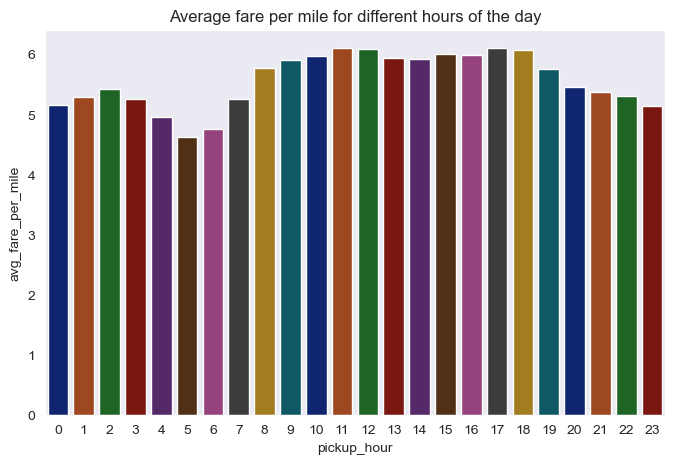

In [87]:
# Compare the average fare per mile for different days and for different times of the day
plt.figure(figsize = (8,5))
avg_fare_hour = df.groupby("pickup_hour", as_index= False)[["fare_amount", "trip_distance"]].sum()
avg_fare_hour["avg_fare_per_mile"] = avg_fare_hour.fare_amount/ avg_fare_hour.trip_distance
sns.barplot(avg_fare_hour , x = "pickup_hour", y = "avg_fare_per_mile", palette= "dark")
plt.title("Average fare per mile for different hours of the day");

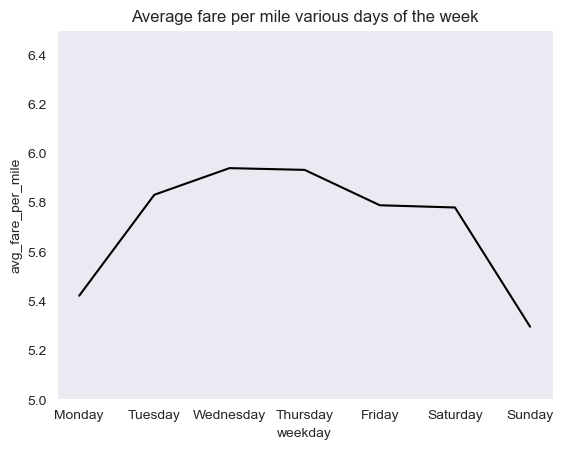

In [88]:
weekly_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_fare_day = df.groupby(df.tpep_pickup_datetime.dt.day_name())[["fare_amount", 
                                                                 "trip_distance"]].sum().reindex(weekly_order).reset_index(names =["weekday"])
avg_fare_day["avg_fare_per_mile"] = avg_fare_day.fare_amount/ avg_fare_day.trip_distance
sns.lineplot(avg_fare_day , x = "weekday", y = "avg_fare_per_mile", color = "black")
plt.title("Average fare per mile various days of the week")
plt.ylim(5,6.5)
sns.set_style("dark")

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

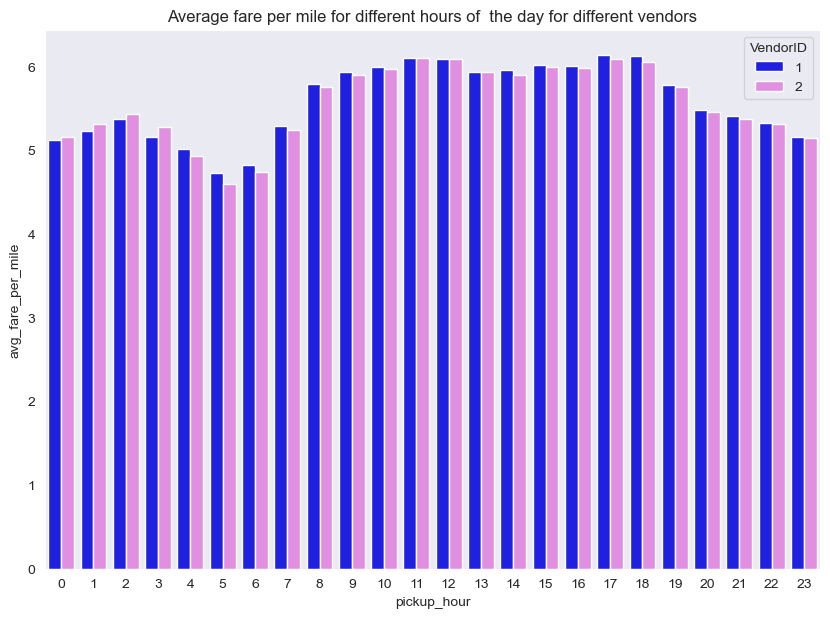

In [89]:
# Compare fare per mile for different vendors
avg_fare_vendor = df.groupby(["VendorID", "pickup_hour"],as_index= False)[["fare_amount", "trip_distance"]].sum()
avg_fare_vendor["avg_fare_per_mile"] = avg_fare_vendor.fare_amount/ avg_fare_vendor.trip_distance
plt.figure(figsize=(10,7))
sns.barplot(avg_fare_vendor, x = "pickup_hour", y = "avg_fare_per_mile", hue = "VendorID", palette= {1: "blue", 2: "violet"})
plt.title("Average fare per mile for different hours of  the day for different vendors");


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [90]:
# Defining distance tiers
print(df.trip_distance.max())

187.0


In [91]:
bins = pd.cut(df.trip_distance, [0,2,5,200])
bins.value_counts()
fare_comparison = df.groupby(["VendorID", bins])[["fare_amount", "trip_distance"]].sum().reset_index(names = ["VendorID", "distance_tiers"])
fare_comparison["avg_fare_per_mile"] = fare_comparison.fare_amount/ fare_comparison.trip_distance
fare_comparison

,VendorID,distance_tiers,fare_amount,trip_distance,avg_fare_per_mile
0,1,"(0, 2]",2703961.26,309773.20,8.728842
1,1,"(2, 5]",2321394.63,371047.50,6.256327
2,1,"(5, 200]",3640843.17,859325.90,4.236860
3,2,"(0, 2]",7991290.17,893972.85,8.939075
4,2,"(2, 5]",7468487.27,1162753.89,6.423102
5,2,"(5, 200]",12880451.30,2989713.09,4.308257


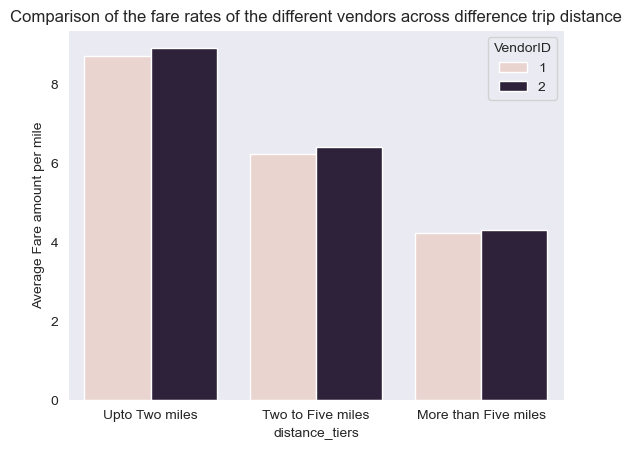

In [92]:
sns.barplot(fare_comparison, x ="distance_tiers", y = "avg_fare_per_mile", hue ="VendorID")
plt.xticks(ticks = [0,1,2], labels = ["Upto Two miles", "Two to Five miles", "More than Five miles"])
plt.ylabel("Average Fare amount per mile")
plt.title("Comparison of the fare rates of the different vendors across difference trip distance");

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [93]:
# Analyze tip percentages based on distances, passenger counts and pickup times
df["tip_pct"] = df.tip_amount / df.fare_amount * 100
tip_df = df[(df.payment_type == 1) & (df.tip_pct <= 100)]

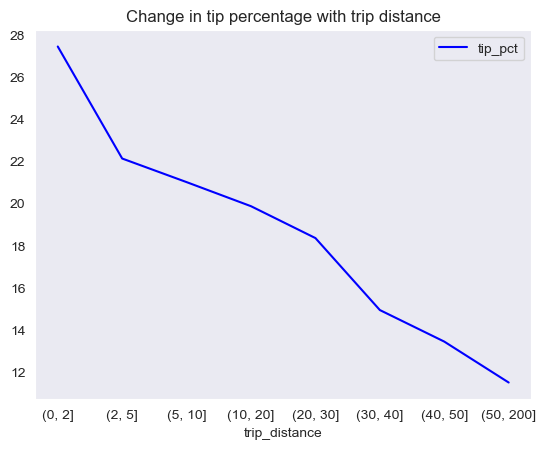

In [94]:
bins = pd.cut(df.trip_distance, [0,2,5,10,20,30,40,50,200])

tip_distance = tip_df.groupby(bins)[["tip_pct"]].mean()
tip_distance.plot(color = "blue")
plt.title("Change in tip percentage with trip distance");

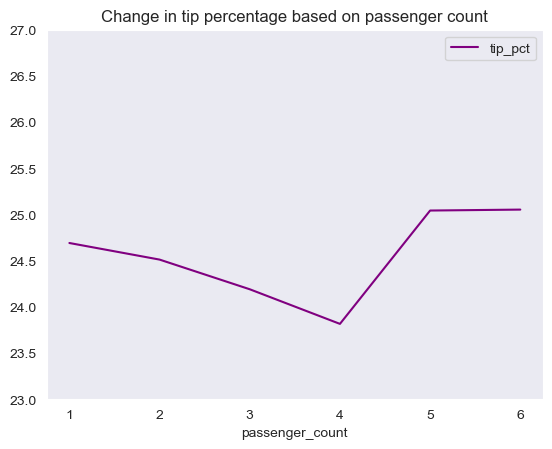

In [95]:
tip_passenger = tip_df.groupby("passenger_count")[["tip_pct"]].mean()
tip_passenger.plot(color = "purple")
plt.ylim(23, 27)
plt.title("Change in tip percentage based on passenger count");

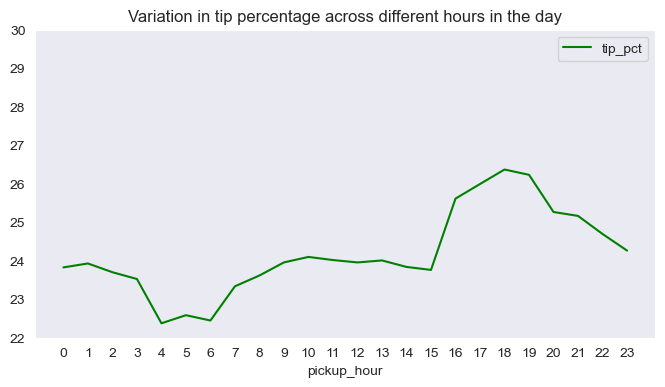

In [96]:
tip_hourly = tip_df.groupby("pickup_hour")[["tip_pct"]].mean()
tip_hourly.plot(color = "green", figsize = (8,4), xticks = np.arange(24), ylim = (22,30),
               title = "Variation in tip percentage across different hours in the day");

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [97]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_pct  = tip_df[tip_df.tip_pct < 10].sort_values("tip_pct")
high_tip_pct = tip_df[(tip_df.tip_pct > 25)].sort_values("tip_pct")
merged_tip_pct = pd.concat([low_tip_pct , high_tip_pct])
merged_tip_pct["category"] = np.where(merged_tip_pct.tip_pct > 25, "high", "low")
plot_df = merged_tip_pct.pivot_table(index = "category", columns = ["passenger_count", "pickup_hour", bins], values ="tip_pct", aggfunc= "mean")

plot_df = plot_df.stack(level = [0,1,2]).reset_index(name = "tip_pct")

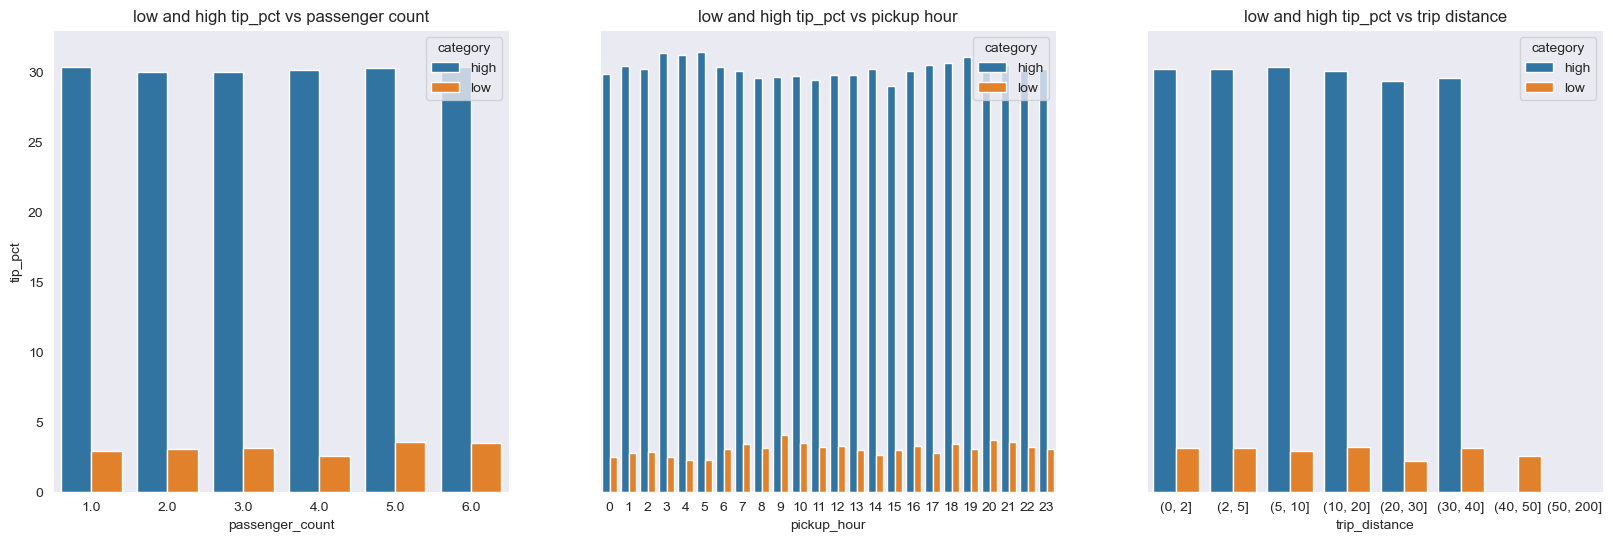

In [98]:
fig, ax  = plt.subplots(1,3 , figsize = (20,6), sharey= True)
sns.barplot(plot_df , x = "passenger_count",y = "tip_pct", hue = "category", ax = ax[0], errorbar = None)
sns.barplot(plot_df , x = "pickup_hour",y = "tip_pct", hue = "category", ax = ax[1], errorbar= None)
sns.barplot(plot_df , x = bins,y = "tip_pct", hue = "category", ax = ax[2], errorbar = None)
ax[0].set_title("low and high tip_pct vs passenger count")
ax[1].set_title("low and high tip_pct vs pickup hour")
ax[2].set_title("low and high tip_pct vs trip distance");

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [99]:
# See how passenger count varies across hours and days

passenger_count = df.groupby([df.tpep_pickup_datetime.dt.day_name(), "pickup_hour"])[["passenger_count"]].mean().reset_index(names =["weekday", "pickup_hour"])

heatmap_plot = passenger_count.pivot(index = "weekday", columns = "pickup_hour", values= "passenger_count")
passenger_count_hour = df.groupby("pickup_hour")["passenger_count"].mean().reset_index()
weekly_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
passenger_count_day = df.groupby(df.tpep_pickup_datetime.dt.day_name())[["passenger_count"]].mean().reindex(weekly_order).reset_index(names = "weekday")

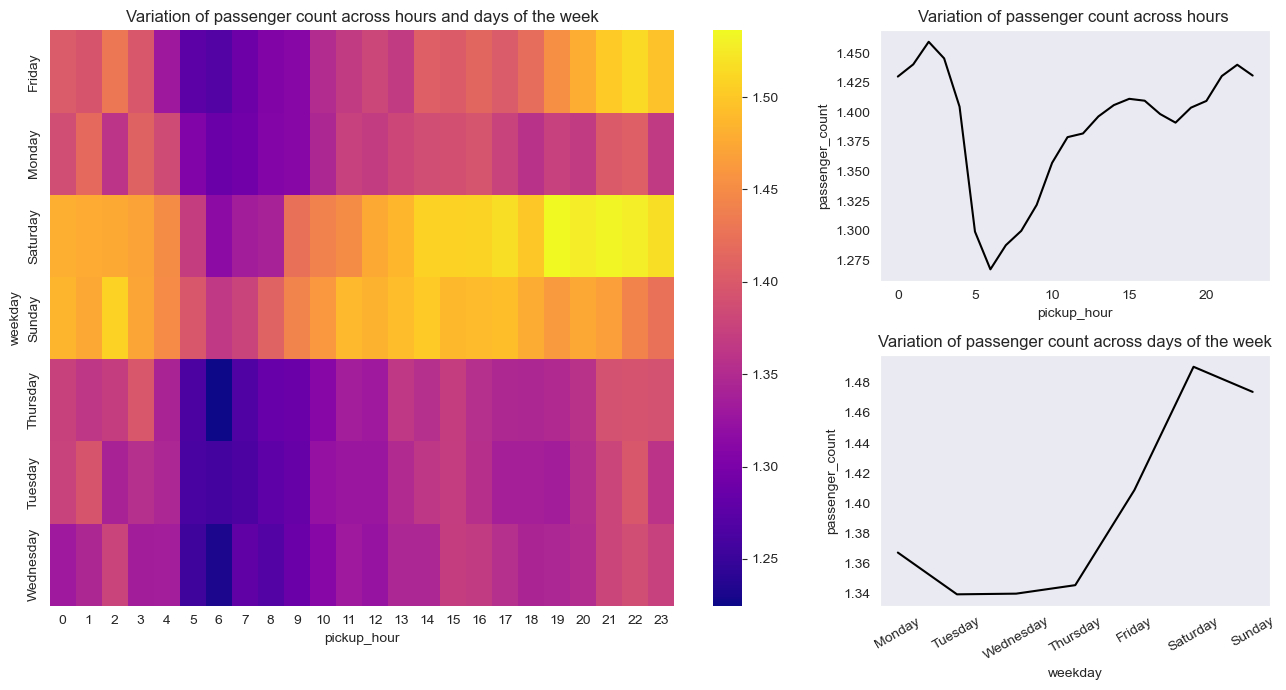

In [100]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(13, 7))
gs = GridSpec(2, 2,  width_ratios=[2, 1], height_ratios=[1, 1] )

ax_big = fig.add_subplot(gs[:, 0])
ax_small1 = fig.add_subplot(gs[0, 1])
ax_small2 = fig.add_subplot(gs[1, 1])
sns.set_style("darkgrid")

sns.heatmap(heatmap_plot, cmap = "plasma", ax = ax_big)
# heatmap_plot.plot(kind = "hexbin", ax = ax_big)
ax_big.set_title("Variation of passenger count across hours and days of the week")

sns.lineplot(passenger_count_hour,x = "pickup_hour", y = "passenger_count",  ax = ax_small1, color = "black")
ax_small1.set_title("Variation of passenger count across hours ")

sns.lineplot(passenger_count_day, x = "weekday", y = "passenger_count", ax = ax_small2, color = "black")
ax_small2.set_title("Variation of passenger count across days of the week")

plt.xticks(rotation = 30 )
plt.tight_layout();

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

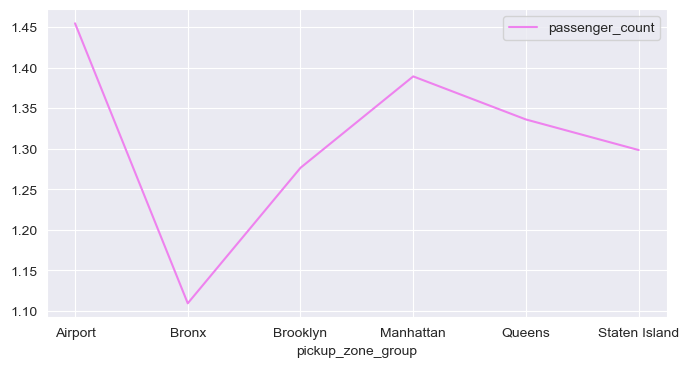

In [101]:
# How does passenger count vary across zones
zonal_passenger_count = df.groupby("pickup_zone_group")[["passenger_count"]].mean()
plt.figure(figsize=(8,4))
sns.lineplot(zonal_passenger_count, palette= ["violet"]);

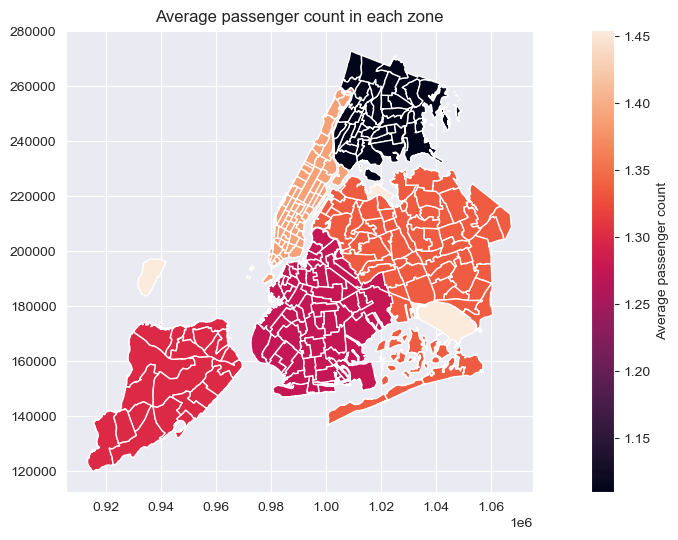

In [102]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
fig, ax = plt.subplots(1,1, figsize=(15,6))
zonal_passenger = df.groupby("pickup_zone_group")[["passenger_count"]].mean().reset_index()
zones_passenger = pd.merge(zones, zonal_passenger, left_on="zone_group", right_on="pickup_zone_group")
zones_passenger.plot(column="passenger_count", ax =  ax, legend = True, legend_kwds = {'label': "Average passenger count", 'orientation': "vertical"})
plt.title("Average passenger count in each zone");

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [103]:
# How often is each surcharge applied?
# These are the surcharges present in our data frame.
extra_charge_col = ["improvement_surcharge", "congestion_surcharge", "mta_tax", "airport_fee", "tolls_amount","extra"]
for col in extra_charge_col: 
    print(df[col].value_counts())

improvement_surcharge
1.0    1895158
0.3        787
0.0        362
Name: count, dtype: int64
congestion_surcharge
2.50    1751099
0.00     145206
0.75          1
2.75          1
Name: count, dtype: int64
mta_tax
0.50    1878770
0.00      17462
0.80         55
0.05         16
1.02          2
4.00          1
1.53          1
Name: count, dtype: int64
airport_fee
0.00    1727217
1.75     126920
1.25      42170
Name: count, dtype: int64
tolls_amount
0.00     1739963
6.55       85749
6.94       57838
12.75       1971
14.75       1583
          ...   
22.94          1
10.09          1
23.19          1
36.25          1
10.95          1
Name: count, Length: 731, dtype: int64
extra
0.00     736520
2.50     468764
1.00     380187
5.00     135676
3.50     106553
6.00      16906
7.50      16729
4.25       6363
9.25       6329
1.75       3251
3.75       2504
2.75       2235
6.75       2195
8.75       2060
10.25      1688
1.25       1400
7.75       1360
11.75      1343
2.25        859
6.25        756

In [104]:
# But I excluded mta_tax and improvement_surcharge due they have mostly constant value across the rows.
extra_charge_col = [ "congestion_surcharge", "airport_fee", "tolls_amount","extra"]
df["extra_charge"] = df[extra_charge_col].gt(0).any(axis=1).astype(int)
df.extra_charge.value_counts()


extra_charge
1    1857638
0      38669
Name: count, dtype: int64

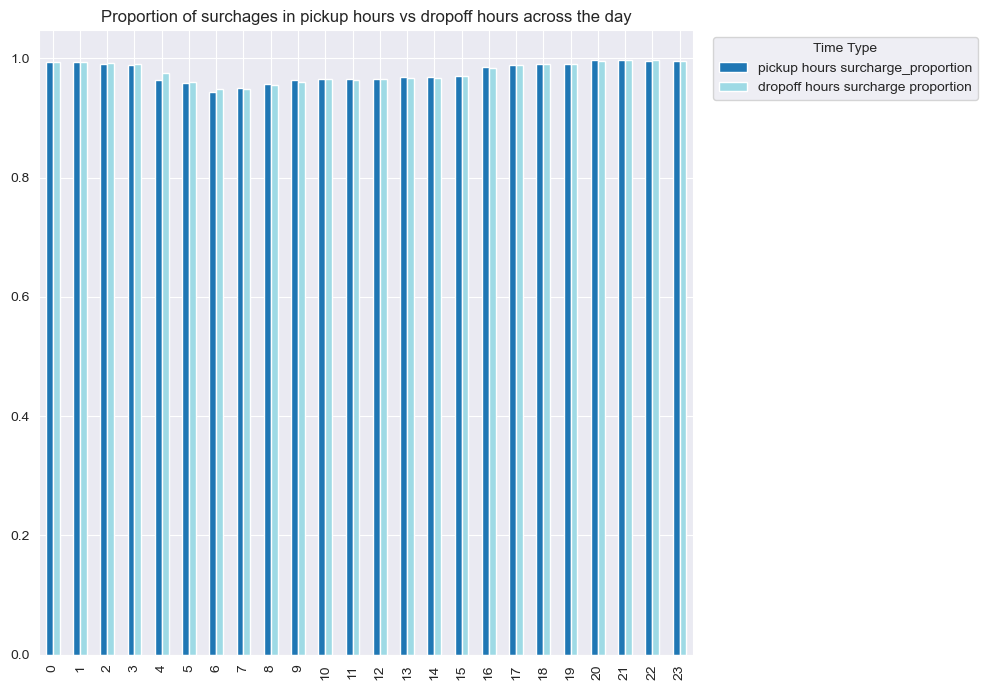

In [105]:
extra_charge_time = pd.DataFrame({"pickup hours surcharge_proportion": df[df.extra_charge == 1].groupby("pickup_hour").size()/df.groupby("pickup_hour").size(),
                                  "dropoff hours surcharge proportion": df[df.extra_charge == 1].groupby("dropoff_hour").size()/df.groupby("dropoff_hour").size()})

extra_charge_time.plot(kind = "bar", figsize= (10,7),colormap= "tab20",
                      title = "Proportion of surchages in pickup hours vs dropoff hours across the day")

plt.legend(title="Time Type", bbox_to_anchor=(1.02, 1))
plt.tight_layout();

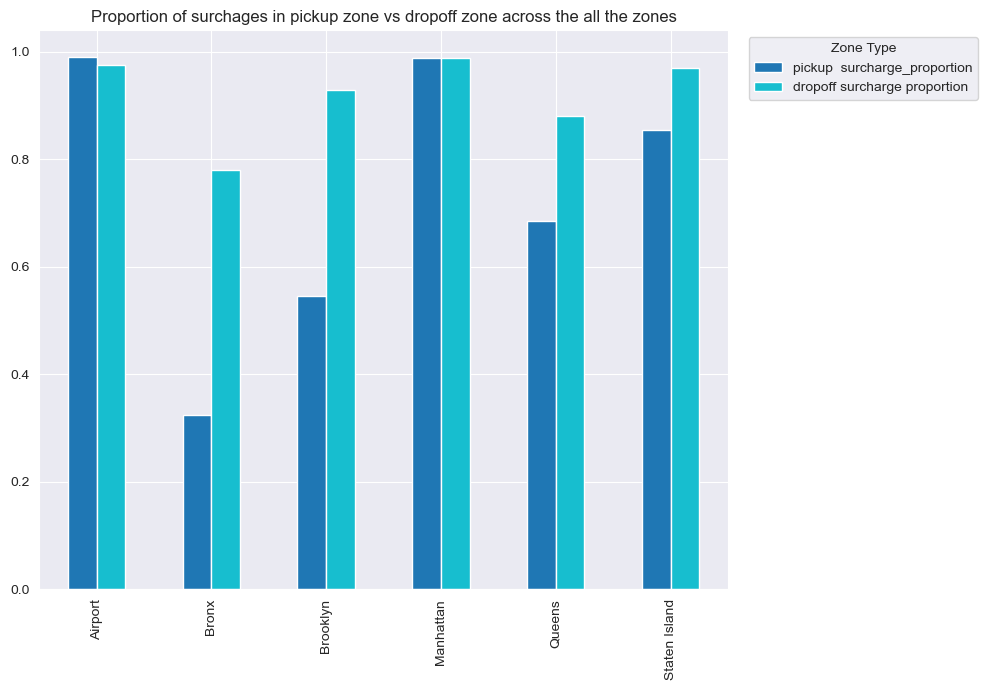

In [106]:
extra_charge_time_zone = pd.DataFrame({"pickup  surcharge_proportion": df[df.extra_charge == 1].groupby("pickup_zone_group").size()/df.groupby("pickup_zone_group").size(),
                                      "dropoff surcharge proportion": df[df.extra_charge == 1].groupby("dropoff_zone_group").size()/df.groupby("dropoff_zone_group").size()})

extra_charge_time_zone.plot(kind = "bar", figsize= (10,7),colormap= "tab10",
                            title = "Proportion of surchages in pickup zone vs dropoff zone across the all the zones")
plt.legend(title="Zone Type", bbox_to_anchor=(1.02, 1))

plt.tight_layout();

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

My findings based on the analysis: 

            1.Average trip duration is higher on weekdays during most daytime hours.
              On weekends: Trips are slightly shorter during the day but stay steady in the evening and night.
            
            2.Very low trips and revenue between 2 AM – 5 AM. Peak trips and revenue happen between 10 AM – 8 PM.

            3. Lowest passenger count in early morning and higher passenger count during evening and night.

            4. Weekends have higher passenger count than weekdays.

            5. Tip percentage decreases as trip distance increases.Short trips get higher tip percentage.Long trips get lower tip percentage.

            6.Tip percentage increases during evening and night hours. Lower tips in early morning

            7. Surcharges depend more on destination.
    
            8. Many trips start in outer boroughs and end in Manhattan or airports.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Routing should consider destination also, not only pickup especially trips going towards Airport and Manhattan , as these trips should expect congestion and surcharges.
2. During peak daytime hours, avoid congested routes as possible.
3. During early morning hours, fewer cabs are needed due to low demand.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. More cabs should be placed in outer boroughs during morning and daytime as many trips start here.
2. Maintain good cab availability in Airport and Manhattan zones, as many trips end there and these two places have the most number of trips.
3. Reduce supply during very early morning hours.
4. Increase supply during evening and weekends , when passenger count is high.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Pricing should be zone_aware: Higher and unavoidable surcharges in Manhattan and airports should be reflected
2. Avoid aggressive pricing for long-distance trips , as tip percentage is lower.
3. Daytime pricing is the most important, as most of the revenue comes from daytime.
4. Keep pricing competitive in outer borough areas to attract demand.
5. Short trips have very high tip percentage, so the fare for short trips can be increased slighly.
6. There could be a cashback feature for credit card payments to lessen the cash payments , then the total tips amount will increase which will lead more revenue.